In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Retail_Churn.csv")

In [3]:
df.sample(5)

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
581,582,63,Female,175.74,8627.92,8,46,178.15,2,2,4,271,True,Unsubscribed,True
75,76,56,Other,158.10,7785.70,1,39,464.56,0,2,1,267,False,Unsubscribed,True
361,362,64,Other,34.04,3077.20,2,9,201.44,9,1,4,227,False,Ignored,True
563,564,58,Other,105.79,4066.51,10,52,312.07,8,0,1,101,True,Unsubscribed,True
705,706,23,Female,177.54,4804.62,18,43,454.01,5,0,5,292,False,Responded,False


In [4]:
df['Satisfaction_Score'].value_counts()

Satisfaction_Score
3    219
4    204
1    202
2    192
5    183
Name: count, dtype: int64

In [17]:
df = pd.get_dummies(df, columns=["Gender","Promotion_Response","Target_Churn"], drop_first=True, dtype=int)
df = df.drop(columns = "Customer_ID")
df.sample(5)

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Gender_Male,Gender_Other,Promotion_Response_Responded,Promotion_Response_Unsubscribed,Target_Churn_True
266,68,172.52,8849.87,16,88,322.94,3,3,1,310,False,0,0,1,0,1
462,45,54.51,1877.05,17,64,11.84,3,4,3,154,False,1,0,0,0,0
962,45,89.76,9342.64,1,24,45.07,1,1,3,72,True,0,0,1,0,0
800,59,194.28,648.03,8,28,295.58,7,4,2,275,True,0,1,0,0,1
459,51,165.10,1693.01,11,31,248.53,7,1,2,349,False,1,0,0,1,0


In [18]:
df = df.drop(columns="Email_Opt_In")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1000 non-null   int64  
 1   Annual_Income                    1000 non-null   float64
 2   Total_Spend                      1000 non-null   float64
 3   Years_as_Customer                1000 non-null   int64  
 4   Num_of_Purchases                 1000 non-null   int64  
 5   Average_Transaction_Amount       1000 non-null   float64
 6   Num_of_Returns                   1000 non-null   int64  
 7   Num_of_Support_Contacts          1000 non-null   int64  
 8   Satisfaction_Score               1000 non-null   int64  
 9   Last_Purchase_Days_Ago           1000 non-null   int64  
 10  Gender_Male                      1000 non-null   int32  
 11  Gender_Other                     1000 non-null   int32  
 12  Promotion_Response_Re

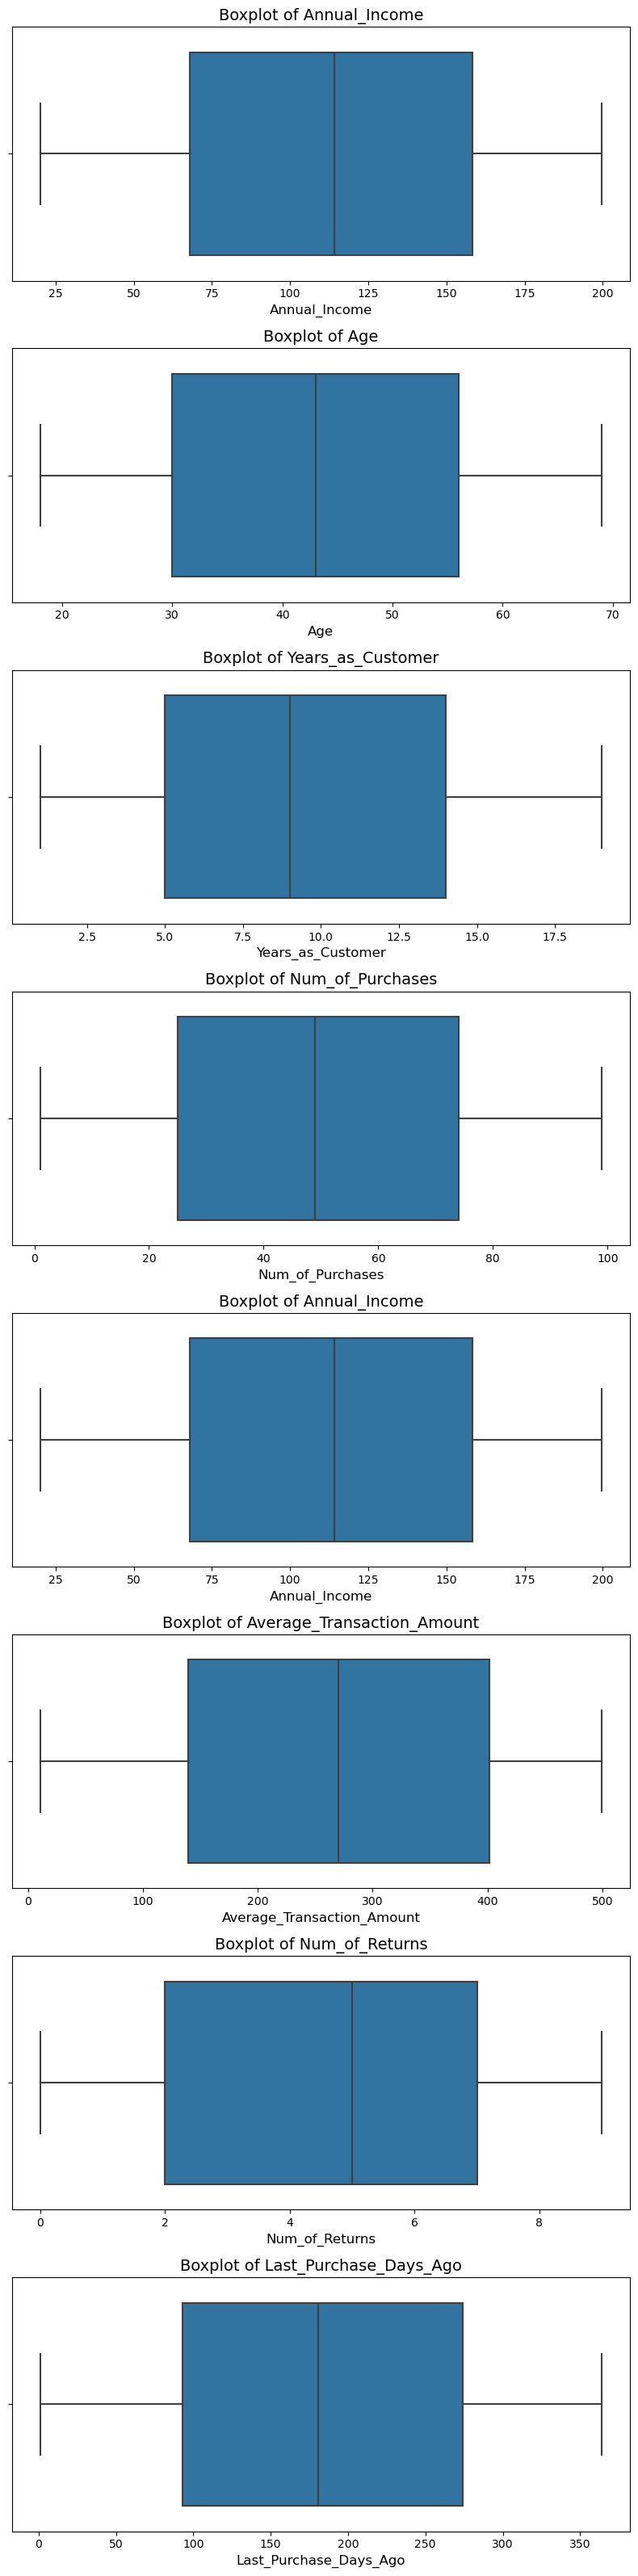

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['Annual_Income', 'Age', 'Years_as_Customer', 'Num_of_Purchases', 'Annual_Income','Average_Transaction_Amount','Num_of_Returns','Last_Purchase_Days_Ago']

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 4 * len(features)))

# If only one subplot, wrap in list to make it iterable
if len(features) == 1:
    axes = [axes]

# Loop and plot
for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

In [24]:
X = df.drop(columns='Target_Churn_True')
y = df['Target_Churn_True']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [26]:
import warnings
warnings.filterwarnings("ignore")

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", [
        "RandomForest", "LogisticRegression", "DecisionTree",
        "KNN", "XGBoost", "LightGBM", "CatBoost", "AdaBoost"
    ])

    if classifier_name == "RandomForest":
        clf = RandomForestClassifier(
            n_estimators=trial.suggest_int("rf_n_estimators", 50, 300),
            max_depth=trial.suggest_int("rf_max_depth", 2, 32, log=True),
            random_state=42
        )

    elif classifier_name == "LogisticRegression":
        clf = make_pipeline(
            StandardScaler(),
            LogisticRegression(
                C=trial.suggest_float("lr_C", 1e-3, 1e2, log=True),
                solver="liblinear",
                random_state=42
            )
        )

    elif classifier_name == "DecisionTree":
        clf = DecisionTreeClassifier(
            max_depth=trial.suggest_int("dt_max_depth", 2, 32, log=True),
            min_samples_split=trial.suggest_int("dt_min_samples_split", 2, 20),
            random_state=42
        )

    elif classifier_name == "KNN":
        clf = make_pipeline(
            StandardScaler(),
            KNeighborsClassifier(n_neighbors=trial.suggest_int("knn_n_neighbors", 3, 15))
        )

    elif classifier_name == "XGBoost":
        clf = XGBClassifier(
            n_estimators=trial.suggest_int("xgb_n_estimators", 50, 300),
            max_depth=trial.suggest_int("xgb_max_depth", 3, 12),
            learning_rate=trial.suggest_float("xgb_learning_rate", 0.01, 0.3),
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

    elif classifier_name == "LightGBM":
        clf = LGBMClassifier(
            n_estimators=trial.suggest_int("lgb_n_estimators", 50, 300),
            max_depth=trial.suggest_int("lgb_max_depth", 3, 12),
            learning_rate=trial.suggest_float("lgb_learning_rate", 0.01, 0.3),
            random_state=42
        )

    elif classifier_name == "CatBoost":
        clf = CatBoostClassifier(
            iterations=trial.suggest_int("cat_iterations", 50, 300),
            depth=trial.suggest_int("cat_depth", 3, 10),
            learning_rate=trial.suggest_float("cat_learning_rate", 0.01, 0.3),
            verbose=0,
            random_state=42
        )

    elif classifier_name == "AdaBoost":
        clf = AdaBoostClassifier(
            n_estimators=trial.suggest_int("ada_n_estimators", 50, 300),
            learning_rate=trial.suggest_float("ada_learning_rate", 0.01, 1.0),
            random_state=42
        )

    # Evaluate using cross-validation
    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3, scoring="accuracy").mean()


In [27]:
# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best result
print("✅ Best Trial:")
print(f"Accuracy: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-04-06 16:33:53,314] A new study created in memory with name: no-name-1f004eb8-0ff4-4dab-ba8c-478779838baa
[I 2025-04-06 16:34:01,503] Trial 0 finished with value: 0.5187594454300545 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 287, 'lgb_max_depth': 3, 'lgb_learning_rate': 0.21145805258545813}. Best is trial 0 with value: 0.5187594454300545.
[I 2025-04-06 16:34:04,602] Trial 1 finished with value: 0.5250110294462749 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 6.315150048087754}. Best is trial 1 with value: 0.5250110294462749.
[I 2025-04-06 16:34:07,894] Trial 2 finished with value: 0.5012108923995382 and parameters: {'classifier': 'KNN', 'knn_n_neighbors': 12}. Best is trial 1 with value: 0.5250110294462749.
[I 2025-04-06 16:34:11,005] Trial 3 finished with value: 0.5250110294462749 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 6.962850702479959}. Best is trial 1 with value: 0.5250110294462749.
[I 2025-04-06 16:34:11,449] Trial 4

✅ Best Trial:
Accuracy: 0.5450142209456225
Params:
  classifier: RandomForest
  rf_n_estimators: 56
  rf_max_depth: 5


In [21]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score

def objective(trial):
    """Objective function for Optuna to optimize XGBClassifier."""
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "lambda": trial.suggest_float("lambda", 0, 5),
        "alpha": trial.suggest_float("alpha", 0, 5),
        "objective": "binary:logistic",  # Use 'multi:softmax' for multi-class classification
        "eval_metric": "logloss",
        "use_label_encoder": False
    }

    # Train XGBClassifier with suggested parameters
    model = xgb.XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    # Predict and evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    return 1 - accuracy  # Minimize error (maximize accuracy)

# Run Optuna optimization
study = optuna.create_study(direction="minimize")  # Minimize classification error
study.optimize(objective, n_trials=50)

# Get best parameters
print(f"Best parameters: {study.best_params}")


[I 2025-02-16 00:16:59,533] A new study created in memory with name: no-name-cf90d070-b233-4c2a-bb89-3e0681724c08
C:\Users\Utkarsh Rai\AppData\Local\Temp\ipykernel_8104\1352721471.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-16 00:17:00,119] Trial 0 finished with value: 0.495 and parameters: {'n_estimators': 650, 'learning_rate': 0.10496765501152516, 'max_depth': 13, 'min_child_weight': 7, 'subsample': 0.7615334098346671,

Best parameters: {'n_estimators': 350, 'learning_rate': 0.07223401884248226, 'max_depth': 14, 'min_child_weight': 2, 'subsample': 0.8160444768128997, 'colsample_bytree': 0.9297107555057739, 'gamma': 0.07868373642976581, 'lambda': 2.7083721180379863, 'alpha': 1.9716772821796558}


In [22]:
best_params = study.best_params

# Train the final model with optimized parameters
final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")

Final Model Accuracy: 0.5750


In [29]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_error",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 50),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
    }

    # Train LightGBM model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_metric="logloss", eval_set=[(X_test, y_test)], callbacks=[early_stopping(10), log_evaluation(1)])

    # Predict & evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print("Accuracy->",accuracy)
    
    return 1 - accuracy  # Optuna minimizes the objective, so we return (1 - accuracy)


In [32]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=80)

# Best parameters found
print("Best parameters:", study.best_params)

[I 2025-04-06 16:37:48,346] A new study created in memory with name: no-name-62700a2c-47b3-4b82-b260-fb29c7f0d24f
[I 2025-04-06 16:37:48,381] Trial 0 finished with value: 0.47 and parameters: {'learning_rate': 0.010788898921593985, 'num_leaves': 72, 'max_depth': 6, 'min_data_in_leaf': 27, 'feature_fraction': 0.6963876576023655, 'bagging_fraction': 0.5834825339178291, 'bagging_freq': 3, 'lambda_l1': 2.1215036984776868e-06, 'lambda_l2': 0.0008030028546050477}. Best is trial 0 with value: 0.47.
[I 2025-04-06 16:37:48,430] Trial 1 finished with value: 0.46499999999999997 and parameters: {'learning_rate': 0.05151174594070255, 'num_leaves': 44, 'max_depth': 8, 'min_data_in_leaf': 28, 'feature_fraction': 0.9194791191975287, 'bagging_fraction': 0.7246114019598504, 'bagging_freq': 2, 'lambda_l1': 1.0331689319716999e-05, 'lambda_l2': 0.05012740647991245}. Best is trial 1 with value: 0.46499999999999997.
[I 2025-04-06 16:37:48,486] Trial 2 finished with value: 0.41500000000000004 and parameters: 

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.6963876576023655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6963876576023655
[LightGBM] [Warning] lambda_l1 is set=2.1215036984776868e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1215036984776868e-06
[LightGBM] [Warning] lambda_l2 is set=0.0008030028546050477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008030028546050477
[LightGBM] [Warning] bagging_fraction is set=0.5834825339178291, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5834825339178291
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.6963876576023655, c

[I 2025-04-06 16:37:48,585] Trial 5 finished with value: 0.475 and parameters: {'learning_rate': 0.16881085989502376, 'num_leaves': 72, 'max_depth': 4, 'min_data_in_leaf': 47, 'feature_fraction': 0.8549464382917076, 'bagging_fraction': 0.9623828214987901, 'bagging_freq': 4, 'lambda_l1': 0.003970060627480018, 'lambda_l2': 2.6445560192611846e-06}. Best is trial 2 with value: 0.41500000000000004.
[I 2025-04-06 16:37:48,617] Trial 6 finished with value: 0.47 and parameters: {'learning_rate': 0.01480737101649632, 'num_leaves': 38, 'max_depth': 8, 'min_data_in_leaf': 50, 'feature_fraction': 0.9513667304136431, 'bagging_fraction': 0.6463380582838916, 'bagging_freq': 6, 'lambda_l1': 0.44709376883110247, 'lambda_l2': 0.0013449938700218545}. Best is trial 2 with value: 0.41500000000000004.
[I 2025-04-06 16:37:48,656] Trial 7 finished with value: 0.47 and parameters: {'learning_rate': 0.02497023982472431, 'num_leaves': 96, 'max_depth': 8, 'min_data_in_leaf': 46, 'feature_fraction': 0.934138854365

[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.8549464382917076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8549464382917076
[LightGBM] [Warning] lambda_l1 is set=0.003970060627480018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003970060627480018
[LightGBM] [Warning] lambda_l2 is set=2.6445560192611846e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6445560192611846e-06
[LightGBM] [Warning] bagging_fraction is set=0.9623828214987901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9623828214987901
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.8549464382917076, col

[I 2025-04-06 16:37:48,855] Trial 10 finished with value: 0.44999999999999996 and parameters: {'learning_rate': 0.11670746899516982, 'num_leaves': 99, 'max_depth': 10, 'min_data_in_leaf': 2, 'feature_fraction': 0.7764317081514627, 'bagging_fraction': 0.8464141498563398, 'bagging_freq': 7, 'lambda_l1': 0.0007232922591756126, 'lambda_l2': 2.455310973568742e-05}. Best is trial 2 with value: 0.41500000000000004.
[I 2025-04-06 16:37:48,967] Trial 11 finished with value: 0.48 and parameters: {'learning_rate': 0.2903746672427923, 'num_leaves': 67, 'max_depth': 5, 'min_data_in_leaf': 6, 'feature_fraction': 0.6911571754412023, 'bagging_fraction': 0.8277713961028669, 'bagging_freq': 8, 'lambda_l1': 1.345504652556669e-05, 'lambda_l2': 1.1315666386610616e-08}. Best is trial 2 with value: 0.41500000000000004.


[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.7764317081514627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7764317081514627
[LightGBM] [Warning] lambda_l1 is set=0.0007232922591756126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007232922591756126
[LightGBM] [Warning] lambda_l2 is set=2.455310973568742e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.455310973568742e-05
[LightGBM] [Warning] bagging_fraction is set=0.8464141498563398, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8464141498563398
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.7764317081514627, colsamp

[I 2025-04-06 16:37:49,085] Trial 12 finished with value: 0.46499999999999997 and parameters: {'learning_rate': 0.0882992463409523, 'num_leaves': 59, 'max_depth': 10, 'min_data_in_leaf': 15, 'feature_fraction': 0.7925625802822056, 'bagging_fraction': 0.7644010099495886, 'bagging_freq': 5, 'lambda_l1': 0.005349046037032, 'lambda_l2': 8.295517405698783}. Best is trial 2 with value: 0.41500000000000004.
[I 2025-04-06 16:37:49,198] Trial 13 finished with value: 0.43500000000000005 and parameters: {'learning_rate': 0.05336864053842789, 'num_leaves': 84, 'max_depth': 6, 'min_data_in_leaf': 16, 'feature_fraction': 0.649322467908966, 'bagging_fraction': 0.9947591046993814, 'bagging_freq': 10, 'lambda_l1': 1.196639805133162e-08, 'lambda_l2': 1.84324333785838e-06}. Best is trial 2 with value: 0.41500000000000004.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.7925625802822056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7925625802822056
[LightGBM] [Warning] lambda_l1 is set=0.005349046037032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005349046037032
[LightGBM] [Warning] lambda_l2 is set=8.295517405698783, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.295517405698783
[LightGBM] [Warning] bagging_fraction is set=0.7644010099495886, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7644010099495886
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.7925625802822056, colsample_bytree=1.

[I 2025-04-06 16:37:49,309] Trial 14 finished with value: 0.405 and parameters: {'learning_rate': 0.05373086256786327, 'num_leaves': 85, 'max_depth': 3, 'min_data_in_leaf': 16, 'feature_fraction': 0.54280583533588, 'bagging_fraction': 0.9823744879773261, 'bagging_freq': 10, 'lambda_l1': 2.1249230152570193e-08, 'lambda_l2': 6.814334217130867e-06}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:49,414] Trial 15 finished with value: 0.43500000000000005 and parameters: {'learning_rate': 0.03692011077397685, 'num_leaves': 85, 'max_depth': 3, 'min_data_in_leaf': 11, 'feature_fraction': 0.512847424529314, 'bagging_fraction': 0.923553892088754, 'bagging_freq': 7, 'lambda_l1': 0.0004046381365387947, 'lambda_l2': 1.9847077967215978e-05}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.54280583533588, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.54280583533588
[LightGBM] [Warning] lambda_l1 is set=2.1249230152570193e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1249230152570193e-08
[LightGBM] [Warning] lambda_l2 is set=6.814334217130867e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.814334217130867e-06
[LightGBM] [Warning] bagging_fraction is set=0.9823744879773261, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9823744879773261
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.54280583533588, colsa

[I 2025-04-06 16:37:49,533] Trial 16 finished with value: 0.41000000000000003 and parameters: {'learning_rate': 0.08453287384235114, 'num_leaves': 85, 'max_depth': 9, 'min_data_in_leaf': 20, 'feature_fraction': 0.8322917490364681, 'bagging_fraction': 0.8900341143593663, 'bagging_freq': 10, 'lambda_l1': 0.03409414313360865, 'lambda_l2': 1.728495521371395e-06}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:49,650] Trial 17 finished with value: 0.41500000000000004 and parameters: {'learning_rate': 0.08598938159690507, 'num_leaves': 91, 'max_depth': 9, 'min_data_in_leaf': 22, 'feature_fraction': 0.8062573628990684, 'bagging_fraction': 0.8631520058592107, 'bagging_freq': 10, 'lambda_l1': 0.08882782819313341, 'lambda_l2': 3.740096247006446e-05}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8322917490364681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322917490364681
[LightGBM] [Warning] lambda_l1 is set=0.03409414313360865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03409414313360865
[LightGBM] [Warning] lambda_l2 is set=1.728495521371395e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.728495521371395e-06
[LightGBM] [Warning] bagging_fraction is set=0.8900341143593663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8900341143593663
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8322917490364681, colsa

[I 2025-04-06 16:37:49,775] Trial 18 finished with value: 0.43999999999999995 and parameters: {'learning_rate': 0.07422155255284252, 'num_leaves': 49, 'max_depth': 3, 'min_data_in_leaf': 19, 'feature_fraction': 0.7266987977037169, 'bagging_fraction': 0.9661411965816036, 'bagging_freq': 9, 'lambda_l1': 1.379296868342706e-08, 'lambda_l2': 2.0569654492584703e-06}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:49,879] Trial 19 finished with value: 0.41500000000000004 and parameters: {'learning_rate': 0.12710587784139807, 'num_leaves': 79, 'max_depth': 9, 'min_data_in_leaf': 11, 'feature_fraction': 0.9831644984417109, 'bagging_fraction': 0.8863035240068112, 'bagging_freq': 9, 'lambda_l1': 5.968435900005118e-07, 'lambda_l2': 0.00010361886409057746}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7266987977037169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7266987977037169
[LightGBM] [Warning] lambda_l1 is set=1.379296868342706e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.379296868342706e-08
[LightGBM] [Warning] lambda_l2 is set=2.0569654492584703e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0569654492584703e-06
[LightGBM] [Warning] bagging_fraction is set=0.9661411965816036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9661411965816036
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7266987977037169, c

[I 2025-04-06 16:37:49,988] Trial 20 finished with value: 0.47 and parameters: {'learning_rate': 0.03883860026596004, 'num_leaves': 15, 'max_depth': 5, 'min_data_in_leaf': 38, 'feature_fraction': 0.5739669670700769, 'bagging_fraction': 0.5003122501525215, 'bagging_freq': 8, 'lambda_l1': 8.468201972928357e-05, 'lambda_l2': 6.217875037823279e-07}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:50,114] Trial 21 finished with value: 0.41500000000000004 and parameters: {'learning_rate': 0.06723495409316838, 'num_leaves': 78, 'max_depth': 9, 'min_data_in_leaf': 3, 'feature_fraction': 0.8721790148799835, 'bagging_fraction': 0.9253515948795656, 'bagging_freq': 6, 'lambda_l1': 0.008116806773293541, 'lambda_l2': 1.74505496234732e-08}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.5739669670700769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5739669670700769
[LightGBM] [Warning] lambda_l1 is set=8.468201972928357e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.468201972928357e-05
[LightGBM] [Warning] lambda_l2 is set=6.217875037823279e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.217875037823279e-07
[LightGBM] [Warning] bagging_fraction is set=0.5003122501525215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5003122501525215
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.5739669670700769, col

[I 2025-04-06 16:37:50,240] Trial 22 finished with value: 0.41000000000000003 and parameters: {'learning_rate': 0.02533325414598029, 'num_leaves': 90, 'max_depth': 8, 'min_data_in_leaf': 10, 'feature_fraction': 0.8129996131053508, 'bagging_fraction': 0.9970396907141885, 'bagging_freq': 10, 'lambda_l1': 0.041057306727717374, 'lambda_l2': 6.8809818771129545e-06}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:50,371] Trial 23 finished with value: 0.44999999999999996 and parameters: {'learning_rate': 0.029312344197382167, 'num_leaves': 91, 'max_depth': 9, 'min_data_in_leaf': 10, 'feature_fraction': 0.8187561964885658, 'bagging_fraction': 0.9771796417249, 'bagging_freq': 10, 'lambda_l1': 0.08884302024896827, 'lambda_l2': 6.4859281535359745e-06}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8129996131053508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8129996131053508
[LightGBM] [Warning] lambda_l1 is set=0.041057306727717374, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.041057306727717374
[LightGBM] [Warning] lambda_l2 is set=6.8809818771129545e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.8809818771129545e-06
[LightGBM] [Warning] bagging_fraction is set=0.9970396907141885, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9970396907141885
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8129996131053508, c

[I 2025-04-06 16:37:50,494] Trial 24 finished with value: 0.44499999999999995 and parameters: {'learning_rate': 0.04643417004145411, 'num_leaves': 91, 'max_depth': 7, 'min_data_in_leaf': 18, 'feature_fraction': 0.7442697532071304, 'bagging_fraction': 0.9498225794018526, 'bagging_freq': 8, 'lambda_l1': 0.8552278187557819, 'lambda_l2': 3.156572454686006e-07}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:50,627] Trial 25 finished with value: 0.5 and parameters: {'learning_rate': 0.1158852454811366, 'num_leaves': 100, 'max_depth': 10, 'min_data_in_leaf': 7, 'feature_fraction': 0.8306222701892367, 'bagging_fraction': 0.9913068950081837, 'bagging_freq': 10, 'lambda_l1': 0.9032731108495877, 'lambda_l2': 0.00019498881697101883}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.7442697532071304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7442697532071304
[LightGBM] [Warning] lambda_l1 is set=0.8552278187557819, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8552278187557819
[LightGBM] [Warning] lambda_l2 is set=3.156572454686006e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.156572454686006e-07
[LightGBM] [Warning] bagging_fraction is set=0.9498225794018526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9498225794018526
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.7442697532071304, colsample

[I 2025-04-06 16:37:50,748] Trial 26 finished with value: 0.43000000000000005 and parameters: {'learning_rate': 0.06742463245577943, 'num_leaves': 69, 'max_depth': 8, 'min_data_in_leaf': 21, 'feature_fraction': 0.7632009188293642, 'bagging_fraction': 0.8823122553384346, 'bagging_freq': 9, 'lambda_l1': 0.023452327352461503, 'lambda_l2': 1.1045978454603972e-05}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:50,876] Trial 27 finished with value: 0.44499999999999995 and parameters: {'learning_rate': 0.02410287909323825, 'num_leaves': 65, 'max_depth': 5, 'min_data_in_leaf': 13, 'feature_fraction': 0.7233761989601661, 'bagging_fraction': 0.6971912244425013, 'bagging_freq': 7, 'lambda_l1': 0.0011652130092348683, 'lambda_l2': 7.150527121045647e-07}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.7632009188293642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7632009188293642
[LightGBM] [Warning] lambda_l1 is set=0.023452327352461503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023452327352461503
[LightGBM] [Warning] lambda_l2 is set=1.1045978454603972e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1045978454603972e-05
[LightGBM] [Warning] bagging_fraction is set=0.8823122553384346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8823122553384346
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.7632009188293642, col

[I 2025-04-06 16:37:50,989] Trial 28 finished with value: 0.475 and parameters: {'learning_rate': 0.045172695630425655, 'num_leaves': 88, 'max_depth': 9, 'min_data_in_leaf': 7, 'feature_fraction': 0.5040182250254119, 'bagging_fraction': 0.8153597477719726, 'bagging_freq': 10, 'lambda_l1': 1.4416727115834945e-07, 'lambda_l2': 7.027310880634685e-05}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:51,107] Trial 29 finished with value: 0.48 and parameters: {'learning_rate': 0.09599070440415763, 'num_leaves': 73, 'max_depth': 4, 'min_data_in_leaf': 28, 'feature_fraction': 0.683361863383231, 'bagging_fraction': 0.9046501841401957, 'bagging_freq': 9, 'lambda_l1': 0.00010955642682635552, 'lambda_l2': 0.006467424715728729}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.5040182250254119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5040182250254119
[LightGBM] [Warning] lambda_l1 is set=1.4416727115834945e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4416727115834945e-07
[LightGBM] [Warning] lambda_l2 is set=7.027310880634685e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.027310880634685e-05
[LightGBM] [Warning] bagging_fraction is set=0.8153597477719726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8153597477719726
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.5040182250254119, col

[I 2025-04-06 16:37:51,238] Trial 30 finished with value: 0.43000000000000005 and parameters: {'learning_rate': 0.010694280850274683, 'num_leaves': 76, 'max_depth': 7, 'min_data_in_leaf': 16, 'feature_fraction': 0.8972189139650841, 'bagging_fraction': 0.9994886291257211, 'bagging_freq': 8, 'lambda_l1': 0.02073229208290262, 'lambda_l2': 0.5414044616636133}. Best is trial 14 with value: 0.405.
[I 2025-04-06 16:37:51,365] Trial 31 finished with value: 0.41500000000000004 and parameters: {'learning_rate': 0.01885792975840952, 'num_leaves': 83, 'max_depth': 8, 'min_data_in_leaf': 1, 'feature_fraction': 0.8864946721020187, 'bagging_fraction': 0.9293643507688879, 'bagging_freq': 5, 'lambda_l1': 0.002266619382103973, 'lambda_l2': 8.14028423823976e-08}. Best is trial 14 with value: 0.405.


[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.8972189139650841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8972189139650841
[LightGBM] [Warning] lambda_l1 is set=0.02073229208290262, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02073229208290262
[LightGBM] [Warning] lambda_l2 is set=0.5414044616636133, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5414044616636133
[LightGBM] [Warning] bagging_fraction is set=0.9994886291257211, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9994886291257211
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.8972189139650841, colsample_byt

[I 2025-04-06 16:37:51,527] Trial 32 finished with value: 0.385 and parameters: {'learning_rate': 0.017622496023118293, 'num_leaves': 95, 'max_depth': 8, 'min_data_in_leaf': 5, 'feature_fraction': 0.834703517299954, 'bagging_fraction': 0.9466501690077729, 'bagging_freq': 3, 'lambda_l1': 0.02335186096436572, 'lambda_l2': 5.293104531028167e-06}. Best is trial 32 with value: 0.385.
[I 2025-04-06 16:37:51,647] Trial 33 finished with value: 0.47 and parameters: {'learning_rate': 0.013312489115335616, 'num_leaves': 96, 'max_depth': 6, 'min_data_in_leaf': 25, 'feature_fraction': 0.8359570378275962, 'bagging_fraction': 0.9511466055481779, 'bagging_freq': 3, 'lambda_l1': 0.2981753511552631, 'lambda_l2': 6.2432726563114785e-06}. Best is trial 32 with value: 0.385.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.834703517299954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834703517299954
[LightGBM] [Warning] lambda_l1 is set=0.02335186096436572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02335186096436572
[LightGBM] [Warning] lambda_l2 is set=5.293104531028167e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.293104531028167e-06
[LightGBM] [Warning] bagging_fraction is set=0.9466501690077729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9466501690077729
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.834703517299954, colsample_bytr

[I 2025-04-06 16:37:51,791] Trial 34 finished with value: 0.43500000000000005 and parameters: {'learning_rate': 0.02995842568960134, 'num_leaves': 92, 'max_depth': 8, 'min_data_in_leaf': 5, 'feature_fraction': 0.787174038846388, 'bagging_fraction': 0.9446312850467695, 'bagging_freq': 1, 'lambda_l1': 0.021423226882774118, 'lambda_l2': 0.0004761941508614209}. Best is trial 32 with value: 0.385.
[I 2025-04-06 16:37:51,922] Trial 35 finished with value: 0.41000000000000003 and parameters: {'learning_rate': 0.01877675931512406, 'num_leaves': 81, 'max_depth': 7, 'min_data_in_leaf': 9, 'feature_fraction': 0.8465173492770993, 'bagging_fraction': 0.8686796898901499, 'bagging_freq': 3, 'lambda_l1': 2.7161385882438328e-06, 'lambda_l2': 1.4151191356828096e-06}. Best is trial 32 with value: 0.385.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.787174038846388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.787174038846388
[LightGBM] [Warning] lambda_l1 is set=0.021423226882774118, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021423226882774118
[LightGBM] [Warning] lambda_l2 is set=0.0004761941508614209, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004761941508614209
[LightGBM] [Warning] bagging_fraction is set=0.9446312850467695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9446312850467695
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.787174038846388, colsample_by

[I 2025-04-06 16:37:52,045] Trial 36 finished with value: 0.44499999999999995 and parameters: {'learning_rate': 0.059689203886849784, 'num_leaves': 87, 'max_depth': 9, 'min_data_in_leaf': 13, 'feature_fraction': 0.8091117427550778, 'bagging_fraction': 0.9093516786196117, 'bagging_freq': 4, 'lambda_l1': 6.538664966433233e-05, 'lambda_l2': 4.557065760671245e-06}. Best is trial 32 with value: 0.385.
[I 2025-04-06 16:37:52,165] Trial 37 finished with value: 0.47 and parameters: {'learning_rate': 0.01233724916462015, 'num_leaves': 96, 'max_depth': 8, 'min_data_in_leaf': 20, 'feature_fraction': 0.9032649656788034, 'bagging_fraction': 0.9675349905379306, 'bagging_freq': 10, 'lambda_l1': 3.006535915756935, 'lambda_l2': 3.548460838127889e-05}. Best is trial 32 with value: 0.385.


[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8091117427550778, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8091117427550778
[LightGBM] [Warning] lambda_l1 is set=6.538664966433233e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.538664966433233e-05
[LightGBM] [Warning] lambda_l2 is set=4.557065760671245e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.557065760671245e-06
[LightGBM] [Warning] bagging_fraction is set=0.9093516786196117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9093516786196117
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8091117427550778, col

[I 2025-04-06 16:37:52,285] Trial 38 finished with value: 0.47 and parameters: {'learning_rate': 0.020943999093615055, 'num_leaves': 50, 'max_depth': 10, 'min_data_in_leaf': 15, 'feature_fraction': 0.7458248695080917, 'bagging_fraction': 0.7151185822843269, 'bagging_freq': 9, 'lambda_l1': 0.2332209175724658, 'lambda_l2': 5.211503568557974e-07}. Best is trial 32 with value: 0.385.
[I 2025-04-06 16:37:52,399] Trial 39 finished with value: 0.4 and parameters: {'learning_rate': 0.15499067882123657, 'num_leaves': 74, 'max_depth': 7, 'min_data_in_leaf': 4, 'feature_fraction': 0.9304231072742094, 'bagging_fraction': 0.9742984855003697, 'bagging_freq': 2, 'lambda_l1': 0.015143807848028545, 'lambda_l2': 1.7404890470374416e-07}. Best is trial 32 with value: 0.385.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.7458248695080917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458248695080917
[LightGBM] [Warning] lambda_l1 is set=0.2332209175724658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2332209175724658
[LightGBM] [Warning] lambda_l2 is set=5.211503568557974e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.211503568557974e-07
[LightGBM] [Warning] bagging_fraction is set=0.7151185822843269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7151185822843269
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.7458248695080917, colsample

[I 2025-04-06 16:37:52,516] Trial 40 finished with value: 0.515 and parameters: {'learning_rate': 0.17293485045917575, 'num_leaves': 76, 'max_depth': 6, 'min_data_in_leaf': 28, 'feature_fraction': 0.9679939138271191, 'bagging_fraction': 0.8466686549410838, 'bagging_freq': 1, 'lambda_l1': 0.011453134715059017, 'lambda_l2': 1.253923503364511e-07}. Best is trial 32 with value: 0.385.
[I 2025-04-06 16:37:52,640] Trial 41 finished with value: 0.45499999999999996 and parameters: {'learning_rate': 0.15421079595694273, 'num_leaves': 89, 'max_depth': 7, 'min_data_in_leaf': 8, 'feature_fraction': 0.9255071744621413, 'bagging_fraction': 0.9702761965433325, 'bagging_freq': 2, 'lambda_l1': 0.04311912307425553, 'lambda_l2': 1.1180801725638885e-06}. Best is trial 32 with value: 0.385.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.9679939138271191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9679939138271191
[LightGBM] [Warning] lambda_l1 is set=0.011453134715059017, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011453134715059017
[LightGBM] [Warning] lambda_l2 is set=1.253923503364511e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.253923503364511e-07
[LightGBM] [Warning] bagging_fraction is set=0.8466686549410838, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8466686549410838
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.9679939138271191, colsa

[I 2025-04-06 16:37:52,764] Trial 42 finished with value: 0.395 and parameters: {'learning_rate': 0.2135837564459426, 'num_leaves': 72, 'max_depth': 8, 'min_data_in_leaf': 5, 'feature_fraction': 0.8577235898756062, 'bagging_fraction': 0.9403045808945507, 'bagging_freq': 2, 'lambda_l1': 0.002761597611568825, 'lambda_l2': 2.5771041025628443e-07}. Best is trial 32 with value: 0.385.
[I 2025-04-06 16:37:52,893] Trial 43 finished with value: 0.36 and parameters: {'learning_rate': 0.23106117383955713, 'num_leaves': 62, 'max_depth': 7, 'min_data_in_leaf': 4, 'feature_fraction': 0.9408951396418745, 'bagging_fraction': 0.9022683329874014, 'bagging_freq': 2, 'lambda_l1': 0.00217889325401306, 'lambda_l2': 2.6603791433841303e-07}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8577235898756062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8577235898756062
[LightGBM] [Warning] lambda_l1 is set=0.002761597611568825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002761597611568825
[LightGBM] [Warning] lambda_l2 is set=2.5771041025628443e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5771041025628443e-07
[LightGBM] [Warning] bagging_fraction is set=0.9403045808945507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9403045808945507
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8577235898756062, colsamp

[I 2025-04-06 16:37:53,032] Trial 44 finished with value: 0.39 and parameters: {'learning_rate': 0.2938292995945352, 'num_leaves': 62, 'max_depth': 7, 'min_data_in_leaf': 3, 'feature_fraction': 0.9530085062341893, 'bagging_fraction': 0.9379639692098601, 'bagging_freq': 2, 'lambda_l1': 0.0016544705897020896, 'lambda_l2': 2.042181638358442e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:53,153] Trial 45 finished with value: 0.43000000000000005 and parameters: {'learning_rate': 0.2683751162564681, 'num_leaves': 60, 'max_depth': 7, 'min_data_in_leaf': 4, 'feature_fraction': 0.9456091958312888, 'bagging_fraction': 0.9162035773958814, 'bagging_freq': 2, 'lambda_l1': 0.0013167890108051145, 'lambda_l2': 3.149204574216833e-08}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.9530085062341893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9530085062341893
[LightGBM] [Warning] lambda_l1 is set=0.0016544705897020896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016544705897020896
[LightGBM] [Warning] lambda_l2 is set=2.042181638358442e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.042181638358442e-07
[LightGBM] [Warning] bagging_fraction is set=0.9379639692098601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9379639692098601
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.9530085062341893, colsamp

[I 2025-04-06 16:37:53,279] Trial 46 finished with value: 0.405 and parameters: {'learning_rate': 0.2199839540076995, 'num_leaves': 54, 'max_depth': 6, 'min_data_in_leaf': 1, 'feature_fraction': 0.9994178181050244, 'bagging_fraction': 0.9396392048709481, 'bagging_freq': 2, 'lambda_l1': 0.00021847090814777534, 'lambda_l2': 1.904249284569368e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:53,387] Trial 47 finished with value: 0.515 and parameters: {'learning_rate': 0.21301096196832842, 'num_leaves': 40, 'max_depth': 7, 'min_data_in_leaf': 4, 'feature_fraction': 0.9220073717040997, 'bagging_fraction': 0.8038646020617317, 'bagging_freq': 3, 'lambda_l1': 0.0028600751928042636, 'lambda_l2': 2.7757548708036532e-08}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.9994178181050244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9994178181050244
[LightGBM] [Warning] lambda_l1 is set=0.00021847090814777534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021847090814777534
[LightGBM] [Warning] lambda_l2 is set=1.904249284569368e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.904249284569368e-07
[LightGBM] [Warning] bagging_fraction is set=0.9396392048709481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9396392048709481
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.9994178181050244, colsa

[I 2025-04-06 16:37:53,513] Trial 48 finished with value: 0.505 and parameters: {'learning_rate': 0.2517624283102008, 'num_leaves': 64, 'max_depth': 8, 'min_data_in_leaf': 5, 'feature_fraction': 0.9684177482349885, 'bagging_fraction': 0.7605256858068624, 'bagging_freq': 3, 'lambda_l1': 0.00047743297428179204, 'lambda_l2': 2.265086063002616e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:53,632] Trial 49 finished with value: 0.49 and parameters: {'learning_rate': 0.18499902809540517, 'num_leaves': 69, 'max_depth': 7, 'min_data_in_leaf': 3, 'feature_fraction': 0.9064140490125147, 'bagging_fraction': 0.8383301657710298, 'bagging_freq': 1, 'lambda_l1': 0.005961133294420065, 'lambda_l2': 6.6317998956468e-08}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.9684177482349885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9684177482349885
[LightGBM] [Warning] lambda_l1 is set=0.00047743297428179204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047743297428179204
[LightGBM] [Warning] lambda_l2 is set=2.265086063002616e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.265086063002616e-07
[LightGBM] [Warning] bagging_fraction is set=0.7605256858068624, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7605256858068624
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.9684177482349885, colsa

[I 2025-04-06 16:37:53,757] Trial 50 finished with value: 0.405 and parameters: {'learning_rate': 0.14698639003045236, 'num_leaves': 56, 'max_depth': 8, 'min_data_in_leaf': 6, 'feature_fraction': 0.9501350622835711, 'bagging_fraction': 0.8725505599660188, 'bagging_freq': 2, 'lambda_l1': 0.0002117714853807384, 'lambda_l2': 1.031404339443111e-08}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:53,879] Trial 51 finished with value: 0.43000000000000005 and parameters: {'learning_rate': 0.29674245144151157, 'num_leaves': 63, 'max_depth': 7, 'min_data_in_leaf': 1, 'feature_fraction': 0.8705484223607131, 'bagging_fraction': 0.9563702662040972, 'bagging_freq': 2, 'lambda_l1': 0.0020473245367473086, 'lambda_l2': 3.586848567760775e-07}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.9501350622835711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9501350622835711
[LightGBM] [Warning] lambda_l1 is set=0.0002117714853807384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002117714853807384
[LightGBM] [Warning] lambda_l2 is set=1.031404339443111e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.031404339443111e-08
[LightGBM] [Warning] bagging_fraction is set=0.8725505599660188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8725505599660188
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.9501350622835711, colsamp

[I 2025-04-06 16:37:54,001] Trial 52 finished with value: 0.385 and parameters: {'learning_rate': 0.22824757105026863, 'num_leaves': 71, 'max_depth': 6, 'min_data_in_leaf': 8, 'feature_fraction': 0.9366160181476724, 'bagging_fraction': 0.978252604811952, 'bagging_freq': 4, 'lambda_l1': 0.0008093749096082989, 'lambda_l2': 1.2258855486560307e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:54,125] Trial 53 finished with value: 0.39 and parameters: {'learning_rate': 0.24656749338470374, 'num_leaves': 73, 'max_depth': 6, 'min_data_in_leaf': 8, 'feature_fraction': 0.9394510825274502, 'bagging_fraction': 0.9019829633311678, 'bagging_freq': 4, 'lambda_l1': 0.0008760964633972395, 'lambda_l2': 3.971275056314917e-08}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9366160181476724, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9366160181476724
[LightGBM] [Warning] lambda_l1 is set=0.0008093749096082989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008093749096082989
[LightGBM] [Warning] lambda_l2 is set=1.2258855486560307e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2258855486560307e-07
[LightGBM] [Warning] bagging_fraction is set=0.978252604811952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.978252604811952
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9366160181476724, colsamp

[I 2025-04-06 16:37:54,255] Trial 54 finished with value: 0.48 and parameters: {'learning_rate': 0.24575034612319532, 'num_leaves': 70, 'max_depth': 5, 'min_data_in_leaf': 8, 'feature_fraction': 0.9698091293295021, 'bagging_fraction': 0.9136668341153746, 'bagging_freq': 4, 'lambda_l1': 2.5518479738751866e-05, 'lambda_l2': 2.8733329158020348e-08}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:54,380] Trial 55 finished with value: 0.44999999999999996 and parameters: {'learning_rate': 0.1974518035144212, 'num_leaves': 57, 'max_depth': 6, 'min_data_in_leaf': 13, 'feature_fraction': 0.9911414324673796, 'bagging_fraction': 0.8940038518713825, 'bagging_freq': 4, 'lambda_l1': 0.0007531463018402133, 'lambda_l2': 5.488337032772606e-08}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9698091293295021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9698091293295021
[LightGBM] [Warning] lambda_l1 is set=2.5518479738751866e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5518479738751866e-05
[LightGBM] [Warning] lambda_l2 is set=2.8733329158020348e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8733329158020348e-08
[LightGBM] [Warning] bagging_fraction is set=0.9136668341153746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9136668341153746
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9698091293295021, col

[I 2025-04-06 16:37:54,500] Trial 56 finished with value: 0.44499999999999995 and parameters: {'learning_rate': 0.23442000916493458, 'num_leaves': 50, 'max_depth': 6, 'min_data_in_leaf': 12, 'feature_fraction': 0.8570213624592583, 'bagging_fraction': 0.646350602174801, 'bagging_freq': 4, 'lambda_l1': 0.004449975496271344, 'lambda_l2': 1.0970252488916538e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:54,619] Trial 57 finished with value: 0.43000000000000005 and parameters: {'learning_rate': 0.2944669365881394, 'num_leaves': 62, 'max_depth': 5, 'min_data_in_leaf': 8, 'feature_fraction': 0.8854858248347437, 'bagging_fraction': 0.9316117726013255, 'bagging_freq': 3, 'lambda_l1': 0.0008841972090017196, 'lambda_l2': 3.147508335586143e-06}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.8570213624592583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8570213624592583
[LightGBM] [Warning] lambda_l1 is set=0.004449975496271344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004449975496271344
[LightGBM] [Warning] lambda_l2 is set=1.0970252488916538e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0970252488916538e-07
[LightGBM] [Warning] bagging_fraction is set=0.646350602174801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.646350602174801
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.8570213624592583, colsa

[I 2025-04-06 16:37:54,739] Trial 58 finished with value: 0.43500000000000005 and parameters: {'learning_rate': 0.20358520362564617, 'num_leaves': 45, 'max_depth': 6, 'min_data_in_leaf': 6, 'feature_fraction': 0.9413599343841421, 'bagging_fraction': 0.8553464088952422, 'bagging_freq': 5, 'lambda_l1': 3.53707900313679e-05, 'lambda_l2': 8.138517314954417e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:54,857] Trial 59 finished with value: 0.395 and parameters: {'learning_rate': 0.13337684164742375, 'num_leaves': 66, 'max_depth': 6, 'min_data_in_leaf': 3, 'feature_fraction': 0.9175332417175025, 'bagging_fraction': 0.8962433442777394, 'bagging_freq': 3, 'lambda_l1': 0.00034152352534812925, 'lambda_l2': 3.58585254506436e-07}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.9413599343841421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9413599343841421
[LightGBM] [Warning] lambda_l1 is set=3.53707900313679e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.53707900313679e-05
[LightGBM] [Warning] lambda_l2 is set=8.138517314954417e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.138517314954417e-07
[LightGBM] [Warning] bagging_fraction is set=0.8553464088952422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8553464088952422
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.9413599343841421, colsample

[I 2025-04-06 16:37:54,981] Trial 60 finished with value: 0.46499999999999997 and parameters: {'learning_rate': 0.2635431860079783, 'num_leaves': 53, 'max_depth': 8, 'min_data_in_leaf': 38, 'feature_fraction': 0.9665544523196906, 'bagging_fraction': 0.7901407698442682, 'bagging_freq': 1, 'lambda_l1': 0.00016539812743232666, 'lambda_l2': 5.091212180950473e-08}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:55,105] Trial 61 finished with value: 0.395 and parameters: {'learning_rate': 0.13783562098509045, 'num_leaves': 66, 'max_depth': 6, 'min_data_in_leaf': 3, 'feature_fraction': 0.9097386456259265, 'bagging_fraction': 0.8989267627235334, 'bagging_freq': 3, 'lambda_l1': 0.0005175629925661941, 'lambda_l2': 4.2820275330597675e-07}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.9665544523196906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9665544523196906
[LightGBM] [Warning] lambda_l1 is set=0.00016539812743232666, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016539812743232666
[LightGBM] [Warning] lambda_l2 is set=5.091212180950473e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.091212180950473e-08
[LightGBM] [Warning] bagging_fraction is set=0.7901407698442682, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7901407698442682
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.9665544523196906, c

[I 2025-04-06 16:37:55,232] Trial 62 finished with value: 0.43500000000000005 and parameters: {'learning_rate': 0.18287750387052734, 'num_leaves': 71, 'max_depth': 6, 'min_data_in_leaf': 2, 'feature_fraction': 0.9198837601652159, 'bagging_fraction': 0.9339823500791474, 'bagging_freq': 3, 'lambda_l1': 0.00031682186724931946, 'lambda_l2': 1.787848425755382e-08}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:55,350] Trial 63 finished with value: 0.405 and parameters: {'learning_rate': 0.11424724008551035, 'num_leaves': 67, 'max_depth': 6, 'min_data_in_leaf': 10, 'feature_fraction': 0.9520999246987922, 'bagging_fraction': 0.9520942522565454, 'bagging_freq': 4, 'lambda_l1': 0.00818721477572868, 'lambda_l2': 2.2099671456334496e-07}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.9198837601652159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9198837601652159
[LightGBM] [Warning] lambda_l1 is set=0.00031682186724931946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00031682186724931946
[LightGBM] [Warning] lambda_l2 is set=1.787848425755382e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.787848425755382e-08
[LightGBM] [Warning] bagging_fraction is set=0.9339823500791474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9339823500791474
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.9198837601652159, colsa

[I 2025-04-06 16:37:55,470] Trial 64 finished with value: 0.44999999999999996 and parameters: {'learning_rate': 0.22696480975913472, 'num_leaves': 61, 'max_depth': 5, 'min_data_in_leaf': 6, 'feature_fraction': 0.8741563088013505, 'bagging_fraction': 0.8783195642469808, 'bagging_freq': 3, 'lambda_l1': 0.0014969891642715924, 'lambda_l2': 1.1561455699018183e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:55,586] Trial 65 finished with value: 0.485 and parameters: {'learning_rate': 0.2660653158420036, 'num_leaves': 76, 'max_depth': 7, 'min_data_in_leaf': 9, 'feature_fraction': 0.8933330582530148, 'bagging_fraction': 0.9849182407418683, 'bagging_freq': 2, 'lambda_l1': 8.545994267487661e-06, 'lambda_l2': 2.028770472966333e-06}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8741563088013505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8741563088013505
[LightGBM] [Warning] lambda_l1 is set=0.0014969891642715924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014969891642715924
[LightGBM] [Warning] lambda_l2 is set=1.1561455699018183e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1561455699018183e-07
[LightGBM] [Warning] bagging_fraction is set=0.8783195642469808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8783195642469808
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8741563088013505, colsa

[I 2025-04-06 16:37:55,712] Trial 66 finished with value: 0.44499999999999995 and parameters: {'learning_rate': 0.10370343238382582, 'num_leaves': 58, 'max_depth': 5, 'min_data_in_leaf': 3, 'feature_fraction': 0.932736167848642, 'bagging_fraction': 0.9182140335953239, 'bagging_freq': 4, 'lambda_l1': 0.003293025718345062, 'lambda_l2': 0.0013025755344750326}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:55,855] Trial 67 finished with value: 0.41000000000000003 and parameters: {'learning_rate': 0.16926266975955198, 'num_leaves': 32, 'max_depth': 7, 'min_data_in_leaf': 5, 'feature_fraction': 0.9827400435039795, 'bagging_fraction': 0.8938964692825642, 'bagging_freq': 5, 'lambda_l1': 0.0007585788905647169, 'lambda_l2': 9.506253608884342e-07}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.932736167848642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.932736167848642
[LightGBM] [Warning] lambda_l1 is set=0.003293025718345062, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003293025718345062
[LightGBM] [Warning] lambda_l2 is set=0.0013025755344750326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013025755344750326
[LightGBM] [Warning] bagging_fraction is set=0.9182140335953239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9182140335953239
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.932736167848642, colsample_by

[I 2025-04-06 16:37:55,990] Trial 68 finished with value: 0.37 and parameters: {'learning_rate': 0.1908917062719424, 'num_leaves': 73, 'max_depth': 8, 'min_data_in_leaf': 7, 'feature_fraction': 0.913642660951231, 'bagging_fraction': 0.9571937239540682, 'bagging_freq': 6, 'lambda_l1': 4.724393193801954e-05, 'lambda_l2': 1.3593497372034189e-05}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:56,100] Trial 69 finished with value: 0.41500000000000004 and parameters: {'learning_rate': 0.237481413473586, 'num_leaves': 80, 'max_depth': 8, 'min_data_in_leaf': 11, 'feature_fraction': 0.8528177113221385, 'bagging_fraction': 0.9619827878335383, 'bagging_freq': 6, 'lambda_l1': 6.911310644413065e-06, 'lambda_l2': 3.3354816733533046e-06}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.913642660951231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.913642660951231
[LightGBM] [Warning] lambda_l1 is set=4.724393193801954e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.724393193801954e-05
[LightGBM] [Warning] lambda_l2 is set=1.3593497372034189e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3593497372034189e-05
[LightGBM] [Warning] bagging_fraction is set=0.9571937239540682, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9571937239540682
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.913642660951231, colsampl

[I 2025-04-06 16:37:56,231] Trial 70 finished with value: 0.45499999999999996 and parameters: {'learning_rate': 0.1882813274425744, 'num_leaves': 82, 'max_depth': 8, 'min_data_in_leaf': 7, 'feature_fraction': 0.9568657297957348, 'bagging_fraction': 0.9844478517312186, 'bagging_freq': 6, 'lambda_l1': 5.860037626073432e-05, 'lambda_l2': 8.968544025947226e-06}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:56,341] Trial 71 finished with value: 0.4 and parameters: {'learning_rate': 0.20788002489138685, 'num_leaves': 67, 'max_depth': 6, 'min_data_in_leaf': 2, 'feature_fraction': 0.914021682287776, 'bagging_fraction': 0.939491423985334, 'bagging_freq': 2, 'lambda_l1': 0.0001387067091761691, 'lambda_l2': 1.6182136804797212e-05}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.9568657297957348, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9568657297957348
[LightGBM] [Warning] lambda_l1 is set=5.860037626073432e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.860037626073432e-05
[LightGBM] [Warning] lambda_l2 is set=8.968544025947226e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.968544025947226e-06
[LightGBM] [Warning] bagging_fraction is set=0.9844478517312186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9844478517312186
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.9568657297957348, colsamp

[I 2025-04-06 16:37:56,475] Trial 72 finished with value: 0.42000000000000004 and parameters: {'learning_rate': 0.27255917154628195, 'num_leaves': 73, 'max_depth': 7, 'min_data_in_leaf': 5, 'feature_fraction': 0.878301162057851, 'bagging_fraction': 0.9250136219636748, 'bagging_freq': 3, 'lambda_l1': 0.004728739952176807, 'lambda_l2': 4.1650057491336767e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:56,607] Trial 73 finished with value: 0.4 and parameters: {'learning_rate': 0.12712804258458557, 'num_leaves': 69, 'max_depth': 8, 'min_data_in_leaf': 7, 'feature_fraction': 0.8948658888337753, 'bagging_fraction': 0.9067404387639153, 'bagging_freq': 5, 'lambda_l1': 0.00031446369091044817, 'lambda_l2': 4.263287869385942e-08}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.878301162057851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.878301162057851
[LightGBM] [Warning] lambda_l1 is set=0.004728739952176807, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004728739952176807
[LightGBM] [Warning] lambda_l2 is set=4.1650057491336767e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1650057491336767e-07
[LightGBM] [Warning] bagging_fraction is set=0.9250136219636748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9250136219636748
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.878301162057851, colsample_

[I 2025-04-06 16:37:56,730] Trial 74 finished with value: 0.46499999999999997 and parameters: {'learning_rate': 0.1613888412340096, 'num_leaves': 78, 'max_depth': 9, 'min_data_in_leaf': 34, 'feature_fraction': 0.9315856135736992, 'bagging_fraction': 0.9612991934231365, 'bagging_freq': 7, 'lambda_l1': 0.001631344305081849, 'lambda_l2': 7.952142620528256e-05}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:56,858] Trial 75 finished with value: 0.405 and parameters: {'learning_rate': 0.2169270046329201, 'num_leaves': 64, 'max_depth': 7, 'min_data_in_leaf': 9, 'feature_fraction': 0.981126568408703, 'bagging_fraction': 0.9423717211612515, 'bagging_freq': 4, 'lambda_l1': 4.0948424590823114e-05, 'lambda_l2': 9.581164983987569e-08}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9315856135736992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9315856135736992
[LightGBM] [Warning] lambda_l1 is set=0.001631344305081849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001631344305081849
[LightGBM] [Warning] lambda_l2 is set=7.952142620528256e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.952142620528256e-05
[LightGBM] [Warning] bagging_fraction is set=0.9612991934231365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9612991934231365
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9315856135736992, colsa

[I 2025-04-06 16:37:56,981] Trial 76 finished with value: 0.41500000000000004 and parameters: {'learning_rate': 0.24136166735065373, 'num_leaves': 13, 'max_depth': 9, 'min_data_in_leaf': 1, 'feature_fraction': 0.9117927922508541, 'bagging_fraction': 0.8613079240905916, 'bagging_freq': 1, 'lambda_l1': 0.010365667809194972, 'lambda_l2': 2.8196469240170066e-07}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:57,103] Trial 77 finished with value: 0.41000000000000003 and parameters: {'learning_rate': 0.17207239833295634, 'num_leaves': 73, 'max_depth': 8, 'min_data_in_leaf': 4, 'feature_fraction': 0.939517313951583, 'bagging_fraction': 0.88326903053228, 'bagging_freq': 2, 'lambda_l1': 9.18695830764652e-05, 'lambda_l2': 1.3273147581950566e-06}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.9117927922508541, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9117927922508541
[LightGBM] [Warning] lambda_l1 is set=0.010365667809194972, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010365667809194972
[LightGBM] [Warning] lambda_l2 is set=2.8196469240170066e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8196469240170066e-07
[LightGBM] [Warning] bagging_fraction is set=0.8613079240905916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8613079240905916
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.9117927922508541, colsamp

[I 2025-04-06 16:37:57,233] Trial 78 finished with value: 0.45999999999999996 and parameters: {'learning_rate': 0.1365040482567356, 'num_leaves': 76, 'max_depth': 6, 'min_data_in_leaf': 42, 'feature_fraction': 0.8427728473167979, 'bagging_fraction': 0.9732452395841047, 'bagging_freq': 3, 'lambda_l1': 1.7201644365687585e-05, 'lambda_l2': 1.6543035238777535e-08}. Best is trial 43 with value: 0.36.
[I 2025-04-06 16:37:57,340] Trial 79 finished with value: 0.46499999999999997 and parameters: {'learning_rate': 0.19444957188987305, 'num_leaves': 59, 'max_depth': 4, 'min_data_in_leaf': 6, 'feature_fraction': 0.9557538903307901, 'bagging_fraction': 0.8234204932761837, 'bagging_freq': 5, 'lambda_l1': 0.002720931546981427, 'lambda_l2': 0.26485223430857435}. Best is trial 43 with value: 0.36.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.8427728473167979, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8427728473167979
[LightGBM] [Warning] lambda_l1 is set=1.7201644365687585e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7201644365687585e-05
[LightGBM] [Warning] lambda_l2 is set=1.6543035238777535e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6543035238777535e-08
[LightGBM] [Warning] bagging_fraction is set=0.9732452395841047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9732452395841047
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.8427728473167979,

In [34]:
# Updated best parameters
best_params = {
    'learning_rate': 0.04727678176799223,
    'num_leaves': 25,
    'max_depth': 7,
    'min_data_in_leaf': 15,
    'feature_fraction': 0.6978310315953775,
    'bagging_fraction': 0.9212842862468595,
    'bagging_freq': 10,
    'lambda_l1': 0.22819479722940772,
    'lambda_l2': 1.9300612761617002e-05,
    'objective': 'binary'  # Change to 'multiclass' if it's a multi-class problem
}

# Train the final model with the best parameters
model = lgb.LGBMClassifier(**best_params)

# Fit the model
model.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    eval_metric="logloss", 
    callbacks=[lgb.early_stopping(10)]
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6978310315953775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6978310315953775
[LightGBM] [Warning] lambda_l1 is set=0.22819479722940772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22819479722940772
[LightGBM] [Warning] lambda_l2 is set=1.9300612761617002e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9300612761617002e-05
[LightGBM] [Warning] bagging_fraction is set=0.9212842862468595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9212842862468595
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6978310315953775, col

In [35]:
import pickle

# Save the trained model
with open("retail_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
def objective(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Define model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Train model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # Optuna will maximize this metric


In [30]:
# Create Optuna study
study = optuna.create_study(direction="maximize")  # We want to maximize accuracy
study.optimize(objective, n_trials=100)  # Run 50 trials

# Print best parameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-02-16 00:36:00,479] A new study created in memory with name: no-name-4f9fdbed-a836-469e-a6c6-7b8371694c78
[I 2025-02-16 00:36:00,801] Trial 0 finished with value: 0.54 and parameters: {'n_estimators': 55, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.54.
[I 2025-02-16 00:36:01,167] Trial 1 finished with value: 0.555 and parameters: {'n_estimators': 116, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.555.
[I 2025-02-16 00:36:01,596] Trial 2 finished with value: 0.53 and parameters: {'n_estimators': 120, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.555.
[I 2025-02-16 00:36:02,921] Trial 3 finished with value: 0.52 and parameters: {'n_estimators': 284, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.555.
[I 2025-02-16 00:36:04,148] Trial 4 finished with value: 0.54 and parameters: {'n_estimato

Best hyperparameters: {'n_estimators': 137, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2}
Best accuracy: 0.59
